In [2]:
import os
import zipfile
import requests

def download_data(url, name, path='data'):
    if not os.path.exists(path):
        os.mkdir(path)
        
    response = requests.get(url)
    with open(os.path.join(path, name),'wb')as f:
        f.write(response.content)
        
    z = zipfile.ZipFile(os.path.join(path, 'vehicles.zip'))
    z.extractall(path)

VEHICLES = 'http://bit.ly/ddl-cars'

download_data(VEHICLES, 'vehicles.zip')

In [3]:
import pandas as pd
path = 'data'

vehicles = pd.read_csv(os.path.join(path,'vehicles.csv'))

C:\Users\D.K\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
pd.options.display.max_columns = None
vehicles.head()


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass','fuelType','barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'fuelCost08']
vehicles = vehicles[select_columns][vehicles.year<=2016].drop_duplicates().dropna()

vehicles.sort_values(['make','model','year'])

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,barrels08,city08,highway08,comb08,co2TailpipeGpm,fuelCost08
19316,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
19314,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
358,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
369,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
25797,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24562,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
26884,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
27443,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
29608,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [6]:
vehicles.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,barrels08,city08,highway08,comb08,co2TailpipeGpm,fuelCost08
0,Alfa Romeo,Spider Veloce 2000,1985,2.0,4.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,15.695714,19,25,21,423.190476,1600
1,Ferrari,Testarossa,1985,4.9,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,29.964545,9,14,11,807.909091,3050
2,Dodge,Charger,1985,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,12.207778,23,33,27,329.148148,1250
3,Dodge,B150/B250 Wagon 2WD,1985,5.2,8.0,Automatic 3-spd,Rear-Wheel Drive,Vans,Regular,29.964545,10,12,11,807.909091,3050
4,Subaru,Legacy AWD Turbo,1993,2.2,4.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,Premium,17.347895,17,23,19,467.736842,2150


In [7]:
vehicles.shape

(35095, 15)

In [8]:
vehicles.isnull().sum()

make              0
model             0
year              0
displ             0
cylinders         0
trany             0
drive             0
VClass            0
fuelType          0
barrels08         0
city08            0
highway08         0
comb08            0
co2TailpipeGpm    0
fuelCost08        0
dtype: int64

In [9]:
vehicles.columns

Index(['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive',
       'VClass', 'fuelType', 'barrels08', 'city08', 'highway08', 'comb08',
       'co2TailpipeGpm', 'fuelCost08'],
      dtype='object')

In [10]:
vehicles.columns=['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders', 'Transmission', 'Drivetrain',
       'Vehicle Class', 'Fuel Type', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

In [11]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(df[column].name,len(df[column].unique()),df[column].dtype))
unique_col_values(vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


In [12]:
vehicles['Transmission'].value_counts()

Automatic 4-spd                     10582
Manual 5-spd                         7764
Automatic 3-spd                      2597
Automatic (S6)                       2455
Manual 6-spd                         2336
Automatic 5-spd                      2171
Automatic 6-spd                      1351
Manual 4-spd                         1306
Automatic (S5)                        822
Automatic (S8)                        774
Automatic (variable gear ratios)      643
Automatic 7-spd                       630
Automatic (S7)                        238
Automatic (S4)                        229
Auto(AM-S7)                           211
Automatic 8-spd                       207
Auto(AV-S6)                           135
Auto(AM7)                             124
Auto(AM6)                             103
Auto(AM-S6)                            82
Manual 3-spd                           74
Manual 7-spd                           56
Automatic 9-spd                        54
Auto(AV-S7)                       

In [13]:
vehicles.loc[vehicles['Transmission'].str.startswith('A'),'Transmission Type']='AUTOMATIC'
vehicles.loc[vehicles['Transmission'].str.startswith('M'),'Transmission Type']='MANUAL'

In [14]:
vehicles['Vehicle Class'].value_counts()

Compact Cars                          5048
Subcompact Cars                       4273
Midsize Cars                          3951
Standard Pickup Trucks                2311
Sport Utility Vehicle - 4WD           2081
Two Seaters                           1724
Large Cars                            1678
Sport Utility Vehicle - 2WD           1615
Special Purpose Vehicles              1404
Small Station Wagons                  1344
Minicompact Cars                      1165
Standard Pickup Trucks 2WD            1125
Vans                                  1121
Standard Pickup Trucks 4WD             938
Midsize-Large Station Wagons           633
Special Purpose Vehicle 2WD            570
Small Pickup Trucks                    524
Vans, Cargo Type                       432
Midsize Station Wagons                 413
Small Sport Utility Vehicle 4WD        412
Small Pickup Trucks 2WD                398
Standard Sport Utility Vehicle 4WD     343
Minivan - 2WD                          324
Small Sport

In [15]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']
#station
#truck
#Special purpose
#Sports utility
#van


In [93]:
vehicles.loc[vehicles['Vehicle Class'].isin(small),'Vehicle Category']='Small Cars'
vehicles.loc[vehicles['Vehicle Class'].isin(large),'Vehicle Category']='large Cars'
vehicles.loc[vehicles['Vehicle Class'].isin(midsize),'Vehicle Category']= 'Midsize Cars'

vehicles.loc[vehicles['Vehicle Class'].str.contains('Station'),'Vehicle Category']='Station Wagon'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Truck'),'Vehicle Category']='Pickup Trucks'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Sport Utility'),'Vehicle Category']='Sport Utility'
vehicles.loc[vehicles['Vehicle Class'].str.contains('Special Purpose'),'Vehicle Category']='Specail Purpose'
vehicles.loc[vehicles['Vehicle Class'].str.lower().str.contains('van'),'Vehicle Category']='Vans & Minivans'



In [94]:
vehicles['Model Type'] = (vehicles['Make'] + " " + vehicles['Model'].str.split().str.get(0))

In [95]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Transmission Type,Vehicle Category,Model Type,Gas,Ethanol,Electric,Propane,Natural Gas,Gas Type,Fuel Efficiency,Engine Size,Emissions,Fuel Cost,Cluster Name
0,Alfa Romeo,Spider Veloce 2000,1985,2.0,4.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,15.695714,19,25,21,423.190476,1600,MANUAL,Small Cars,Alfa Romeo Spider,1,0,0,0,0,Regular,High Efficiency,Very Small Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
1,Ferrari,Testarossa,1985,4.9,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,29.964545,9,14,11,807.909091,3050,MANUAL,Small Cars,Ferrari Testarossa,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
2,Dodge,Charger,1985,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,12.207778,23,33,27,329.148148,1250,MANUAL,Small Cars,Dodge Charger,1,0,0,0,0,Regular,Very High Efficiency,Small Engine,Very Low Emissions,Very Low Fuel Cost,Midsized Balanced
3,Dodge,B150/B250 Wagon 2WD,1985,5.2,8.0,Automatic 3-spd,Rear-Wheel Drive,Vans,Regular,29.964545,10,12,11,807.909091,3050,AUTOMATIC,Vans & Minivans,Dodge B150/B250,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
4,Subaru,Legacy AWD Turbo,1993,2.2,4.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,Premium,17.347895,17,23,19,467.736842,2150,MANUAL,Small Cars,Subaru Legacy,1,0,0,0,0,Premium,Moderate Efficiency,Small Engine,Moderate Emissions,High Fuel Cost,Large Moderately Efficient


In [96]:
vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Gasoline or propane', 'Premium or E85',
       'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity'], dtype=object)

In [97]:
vehicles['Gas'] = 0
vehicles['Ethanol'] = 0
vehicles['Electric'] = 0
vehicles['Propane'] = 0
vehicles['Natural Gas'] = 0

vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1

vehicles.loc[vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1
vehicles.loc[vehicles['Fuel Type'].str.contains('propane'),'Propane']=1
vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

In [98]:
vehicles.loc[vehicles['Fuel Type']=='Gasoline or E85']

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Transmission Type,Vehicle Category,Model Type,Gas,Ethanol,Electric,Propane,Natural Gas,Gas Type,Fuel Efficiency,Engine Size,Emissions,Fuel Cost,Cluster Name
6991,Ford,Taurus,2000,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Large Cars,Gasoline or E85,16.480500,17,26,20,444.350000,1650,AUTOMATIC,large Cars,Ford Taurus,1,1,0,0,0,Regular,Moderate Efficiency,Moderate Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
6993,Ford,Taurus Wagon,2000,3.0,6.0,Automatic 4-spd,Front-Wheel Drive,Midsize Station Wagons,Gasoline or E85,16.480500,17,25,20,444.350000,1650,AUTOMATIC,Station Wagon,Ford Taurus,1,1,0,0,0,Regular,Moderate Efficiency,Moderate Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
6994,Ford,Ranger 2WD FFV,2000,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Gasoline or E85,19.388824,15,20,17,522.764706,1950,AUTOMATIC,Pickup Trucks,Ford Ranger,1,1,0,0,0,Regular,Low Efficiency,Moderate Engine,High Emissions,Moderate Fuel Cost,Large Moderately Efficient
6995,Ford,Ranger 2WD FFV,2000,3.0,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Gasoline or E85,18.311667,16,21,18,493.722222,1850,MANUAL,Pickup Trucks,Ford Ranger,1,1,0,0,0,Regular,Low Efficiency,Moderate Engine,Moderate Emissions,Moderate Fuel Cost,Large Moderately Efficient
6996,Mazda,B3000 FFV 2WD,2000,3.0,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks 2WD,Gasoline or E85,19.388824,15,20,17,522.764706,1950,AUTOMATIC,Pickup Trucks,Mazda B3000,1,1,0,0,0,Regular,Low Efficiency,Moderate Engine,High Emissions,Moderate Fuel Cost,Large Moderately Efficient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28020,Ford,F150 Pickup 4WD FFV,2016,5.0,8.0,Automatic (S6),Part-time 4-Wheel Drive,Standard Pickup Trucks 4WD,Gasoline or E85,19.388824,15,21,17,522.000000,1950,AUTOMATIC,Pickup Trucks,Ford F150,1,1,0,0,0,Regular,Low Efficiency,Very Large Engine,High Emissions,Moderate Fuel Cost,Small Very Efficient
28022,Ford,F150 5.0L 4WD FFV GVWR>7599 LBS PAYLOAD PACKAGE,2016,5.0,8.0,Automatic (S6),Part-time 4-Wheel Drive,Standard Pickup Trucks 4WD,Gasoline or E85,20.600625,14,19,16,555.000000,2100,AUTOMATIC,Pickup Trucks,Ford F150,1,1,0,0,0,Regular,Very Low Efficiency,Very Large Engine,High Emissions,High Fuel Cost,Small Very Efficient
28026,Jeep,Renegade 2WD,2016,2.4,4.0,Automatic 9-spd,Front-Wheel Drive,Small Sport Utility Vehicle 2WD,Gasoline or E85,13.184400,22,31,25,354.000000,1350,AUTOMATIC,Sport Utility,Jeep Renegade,1,1,0,0,0,Regular,Very High Efficiency,Small Engine,Very Low Emissions,Very Low Fuel Cost,Midsized Balanced
28147,Ford,Taurus FWD FFV,2016,3.5,6.0,Automatic (S6),Front-Wheel Drive,Large Cars,Gasoline or E85,15.695714,18,27,21,423.000000,1600,AUTOMATIC,large Cars,Ford Taurus,1,1,0,0,0,Regular,High Efficiency,Moderate Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient


In [99]:
vehicles.loc[vehicles['Fuel Type'].str.contains('Regular|Gasoline'),'Gas Type']='Regular'

vehicles.loc[vehicles['Fuel Type']=='Midgrade','Gas Type'] = 'Midgrade'

vehicles.loc[vehicles['Fuel Type'].str.contains('Premium'),'Gas Type'] = 'Premium'

vehicles.loc[vehicles['Fuel Type']=='Diesel','Gas Type']= 'Diesel'

vehicles.loc[vehicles['Fuel Type'].str.contains('natural|CNG'),'Gas Type'] = 'Natural'

In [100]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Transmission Type,Vehicle Category,Model Type,Gas,Ethanol,Electric,Propane,Natural Gas,Gas Type,Fuel Efficiency,Engine Size,Emissions,Fuel Cost,Cluster Name
0,Alfa Romeo,Spider Veloce 2000,1985,2.0,4.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,15.695714,19,25,21,423.190476,1600,MANUAL,Small Cars,Alfa Romeo Spider,1,0,0,0,0,Regular,High Efficiency,Very Small Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
1,Ferrari,Testarossa,1985,4.9,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,29.964545,9,14,11,807.909091,3050,MANUAL,Small Cars,Ferrari Testarossa,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
2,Dodge,Charger,1985,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,12.207778,23,33,27,329.148148,1250,MANUAL,Small Cars,Dodge Charger,1,0,0,0,0,Regular,Very High Efficiency,Small Engine,Very Low Emissions,Very Low Fuel Cost,Midsized Balanced
3,Dodge,B150/B250 Wagon 2WD,1985,5.2,8.0,Automatic 3-spd,Rear-Wheel Drive,Vans,Regular,29.964545,10,12,11,807.909091,3050,AUTOMATIC,Vans & Minivans,Dodge B150/B250,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
4,Subaru,Legacy AWD Turbo,1993,2.2,4.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,Premium,17.347895,17,23,19,467.736842,2150,MANUAL,Small Cars,Subaru Legacy,1,0,0,0,0,Premium,Moderate Efficiency,Small Engine,Moderate Emissions,High Fuel Cost,Large Moderately Efficient


In [101]:
efficiency_categories = ['Very Low Efficiency','Low Efficiency','Moderate Efficiency','High Efficiency','Very High Efficiency']

vehicles['Fuel Efficiency'] = pd.qcut(vehicles['Combined MPG'],5,efficiency_categories)



In [102]:
engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine',
                     'Large Engine', 'Very Large Engine']
vehicles['Engine Size'] = pd.qcut(vehicles['Engine Displacement'],5,engine_categories)

In [103]:
emission_categories = ['Very Low Emissions', 'Low Emissions',
                        'Moderate Emissions','High Emissions',
                        'Very High Emissions']

vehicles['Emissions'] = pd.qcut(vehicles['CO2 Emission Grams/Mile'],
                                 5, emission_categories)

In [104]:
fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost',
                       'Moderate Fuel Cost','High Fuel Cost',
                       'Very High Fuel Cost']

vehicles['Fuel Cost'] = pd.qcut(vehicles['Fuel Cost/Year'],
                                5, fuelcost_categories)

In [105]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Transmission Type,Vehicle Category,Model Type,Gas,Ethanol,Electric,Propane,Natural Gas,Gas Type,Fuel Efficiency,Engine Size,Emissions,Fuel Cost,Cluster Name
0,Alfa Romeo,Spider Veloce 2000,1985,2.0,4.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,15.695714,19,25,21,423.190476,1600,MANUAL,Small Cars,Alfa Romeo Spider,1,0,0,0,0,Regular,High Efficiency,Very Small Engine,Low Emissions,Low Fuel Cost,Large Moderately Efficient
1,Ferrari,Testarossa,1985,4.9,12.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Regular,29.964545,9,14,11,807.909091,3050,MANUAL,Small Cars,Ferrari Testarossa,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
2,Dodge,Charger,1985,2.2,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,12.207778,23,33,27,329.148148,1250,MANUAL,Small Cars,Dodge Charger,1,0,0,0,0,Regular,Very High Efficiency,Small Engine,Very Low Emissions,Very Low Fuel Cost,Midsized Balanced
3,Dodge,B150/B250 Wagon 2WD,1985,5.2,8.0,Automatic 3-spd,Rear-Wheel Drive,Vans,Regular,29.964545,10,12,11,807.909091,3050,AUTOMATIC,Vans & Minivans,Dodge B150/B250,1,0,0,0,0,Regular,Very Low Efficiency,Very Large Engine,Very High Emissions,Very High Fuel Cost,Large Inefficient
4,Subaru,Legacy AWD Turbo,1993,2.2,4.0,Manual 5-spd,4-Wheel or All-Wheel Drive,Compact Cars,Premium,17.347895,17,23,19,467.736842,2150,MANUAL,Small Cars,Subaru Legacy,1,0,0,0,0,Premium,Moderate Efficiency,Small Engine,Moderate Emissions,High Fuel Cost,Large Moderately Efficient


In [106]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                  'City MPG','Highway MPG','Combined MPG','CO2 Emission Grams/Mile',
                   'Fuel Cost/Year']

In [107]:
from sklearn import preprocessing 
scaler = preprocessing.MaxAbsScaler()

vehicle_clusters = scaler.fit_transform(vehicles[cluster_columns])

vehicle_clusters = pd.DataFrame(vehicle_clusters,columns=cluster_columns)

In [108]:
vehicle_clusters.head()

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0.238095,0.25,0.333333,0.327586,0.409836,0.375000,0.333333,0.275862
1,0.583333,0.75,0.636364,0.155172,0.229508,0.196429,0.636364,0.525862
2,0.261905,0.25,0.259259,0.396552,0.540984,0.482143,0.259259,0.215517
3,0.619048,0.50,0.636364,0.172414,0.196721,0.196429,0.636364,0.525862
4,0.261905,0.25,0.368421,0.293103,0.377049,0.339286,0.368421,0.370690


In [109]:
from sklearn.cluster import KMeans

def kmeans_cluster(df,n_clusters=2):
    model = KMeans(n_clusters = n_clusters, random_state =1)
    clusters = model.fit_predict(df)
    
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [110]:
cluster_results = kmeans_cluster(vehicle_clusters, 8)

In [111]:
cluster_results.head()

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Cluster
0,0.238095,0.25,0.333333,0.327586,0.409836,0.375000,0.333333,0.275862,1
1,0.583333,0.75,0.636364,0.155172,0.229508,0.196429,0.636364,0.525862,0
2,0.261905,0.25,0.259259,0.396552,0.540984,0.482143,0.259259,0.215517,5
3,0.619048,0.50,0.636364,0.172414,0.196721,0.196429,0.636364,0.525862,0
4,0.261905,0.25,0.368421,0.293103,0.377049,0.339286,0.368421,0.370690,1


In [112]:
cluster_size = cluster_results.groupby(['Cluster']).size().reset_index()
cluster_size

,Cluster,0
0,0,1716
1,1,5838
2,2,1826
3,3,2914
4,4,4780
5,5,6334
6,6,7704
7,7,3983


In [113]:
cluster_size.columns = ['Cluster','Count']
cluster_size

,Cluster,Count
0,0,1716
1,1,5838
2,2,1826
3,3,2914
4,4,4780
5,5,6334
6,6,7704
7,7,3983


In [114]:
cluster_means = cluster_results.groupby(['Cluster'],as_index=False).mean()
cluster_means

,Cluster,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153
1,1,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
2,2,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
3,3,0.595544,0.500214,0.395693,0.262833,0.360881,0.315656,0.400243,0.364243
4,4,0.447330,0.373392,0.437782,0.249578,0.310182,0.287242,0.437757,0.371065
5,5,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
6,6,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
7,7,0.632127,0.501946,0.495468,0.218298,0.281866,0.255416,0.495648,0.422877


In [115]:
cluster_summary = pd.merge(cluster_size,cluster_means, on='Cluster')
cluster_summary

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153
1,1,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
2,2,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
3,3,2914,0.595544,0.500214,0.395693,0.262833,0.360881,0.315656,0.400243,0.364243
4,4,4780,0.447330,0.373392,0.437782,0.249578,0.310182,0.287242,0.437757,0.371065
5,5,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
6,6,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
7,7,3983,0.632127,0.501946,0.495468,0.218298,0.281866,0.255416,0.495648,0.422877


In [116]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster','Count']
    cluster_means = results.groupby(['Cluster'],as_index=False).mean()
    cluster_summary = pd.merge(cluster_size,cluster_means, on='Cluster')
    return cluster_summary

In [117]:
summarize_clustering(cluster_results)

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,1716,0.682005,0.570950,0.601364,0.178472,0.234963,0.210290,0.601190,0.544153
1,1,5838,0.267466,0.253950,0.346015,0.314615,0.392238,0.363536,0.345953,0.298589
2,2,1826,0.200601,0.244660,0.215546,0.518356,0.616882,0.587946,0.216954,0.183282
3,3,2914,0.595544,0.500214,0.395693,0.262833,0.360881,0.315656,0.400243,0.364243
4,4,4780,0.447330,0.373392,0.437782,0.249578,0.310182,0.287242,0.437757,0.371065
5,5,6334,0.241518,0.254243,0.281230,0.383366,0.487341,0.447303,0.281191,0.240410
6,6,7704,0.382627,0.374854,0.353653,0.297454,0.405367,0.355896,0.353625,0.314951
7,7,3983,0.632127,0.501946,0.495468,0.218298,0.281866,0.255416,0.495648,0.422877


In [118]:
3,7
1,5,2
4,6

(4, 6)

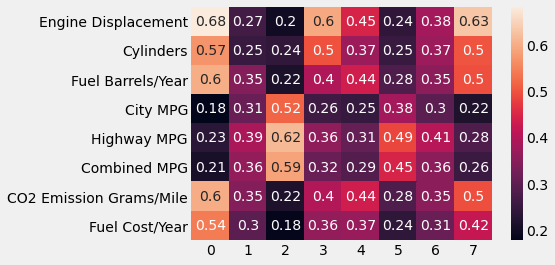

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(cluster_summary[cluster_columns].transpose(),annot = True);

<AxesSubplot:>

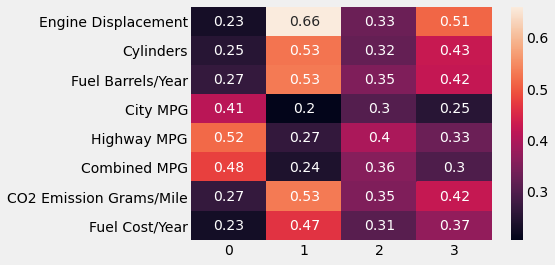

In [120]:
cluster_results = kmeans_cluster(vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(),annot = True)

In [256]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Large Moderately Efficient'

cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Large Inefficient'

cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Midsized Balanced'

cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Small Very Efficient'

vehicles = vehicles.reset_index().drop('index', axis=1)
vehicles['Cluster Name'] = cluster_results['Cluster Name']

<ipython-input-256-51dc9381c0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Large Moderately Efficient'
<ipython-input-256-51dc9381c0b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Large Inefficient'
<ipython-input-256-51dc9381c0b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_result

In [257]:
cluster_results

,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Cluster,Cluster Name
0,0.238095,0.25,0.333333,0.327586,0.409836,0.375000,0.333333,0.275862,2,Midsized Balanced
1,0.583333,0.75,0.636364,0.155172,0.229508,0.196429,0.636364,0.525862,1,Large Inefficient
2,0.261905,0.25,0.259259,0.396552,0.540984,0.482143,0.259259,0.215517,0,Small Very Efficient
3,0.619048,0.50,0.636364,0.172414,0.196721,0.196429,0.636364,0.525862,1,Large Inefficient
4,0.261905,0.25,0.368421,0.293103,0.377049,0.339286,0.368421,0.370690,2,Midsized Balanced
...,...,...,...,...,...,...,...,...,...,...
35090,0.261905,0.25,0.318182,0.327586,0.426230,0.392857,0.318182,0.258621,2,Midsized Balanced
35091,0.261905,0.25,0.304348,0.344828,0.459016,0.410714,0.304348,0.250000,0,Small Very Efficient
35092,0.261905,0.25,0.333333,0.310345,0.393443,0.375000,0.333333,0.275862,2,Midsized Balanced
35093,0.261905,0.25,0.333333,0.310345,0.393443,0.375000,0.333333,0.275862,2,Midsized Balanced


In [258]:
vehicles_2016 = vehicles[vehicles['Year']==2016]

In [259]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped1= grouped.sort_values(grouped.columns[1],ascending=False)

    grouped1 = pd.DataFrame(grouped1).reset_index(drop=True)
    grouped1.columns = [group_field, 'Count']
    return grouped1

In [260]:
grouped = vehicles_2016.groupby('Vehicle Category', as_index=False).size()
grouped

,Vehicle Category,size
0,Midsize Cars,201
1,Pickup Trucks,83
2,Small Cars,440
3,Specail Purpose,24
4,Sport Utility,319
5,Station Wagon,44
6,Vans & Minivans,17
7,large Cars,100


In [261]:
grouped1 = grouped.sort_values(grouped.columns[1],ascending=False)
grouped1

,Vehicle Category,size
2,Small Cars,440
4,Sport Utility,319
0,Midsize Cars,201
7,large Cars,100
1,Pickup Trucks,83
5,Station Wagon,44
3,Specail Purpose,24
6,Vans & Minivans,17


In [127]:
grouped1 = pd.DataFrame(grouped1).reset_index(drop=True)
grouped1

,Vehicle Category,size
0,Small Cars,440
1,Sport Utility,319
2,Midsize Cars,201
3,large Cars,100
4,Pickup Trucks,83
5,Station Wagon,44
6,Specail Purpose,24
7,Vans & Minivans,17


In [128]:
grouped1.columns = ['Vehicle Category', 'Count']
grouped1

,Vehicle Category,Count
0,Small Cars,440
1,Sport Utility,319
2,Midsize Cars,201
3,large Cars,100
4,Pickup Trucks,83
5,Station Wagon,44
6,Specail Purpose,24
7,Vans & Minivans,17


In [129]:
category_counts = agg_count(vehicles_2016, 'Vehicle Category')


In [130]:
category_counts

,Vehicle Category,Count
0,Small Cars,440
1,Sport Utility,319
2,Midsize Cars,201
3,large Cars,100
4,Pickup Trucks,83
5,Station Wagon,44
6,Specail Purpose,24
7,Vans & Minivans,17


Text(0.5, 1.0, 'Vehicles Manufactured by Category (2016)\n')

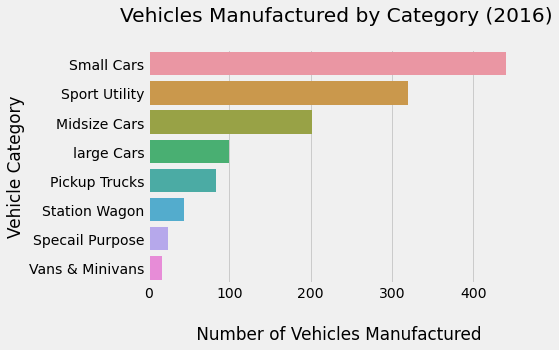

In [131]:
sns.set_style=('whitegrid')
ax = sns.barplot(data=category_counts, x='Count',
               y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (2016)\n')

Text(0.5, 1.0, 'Vehicles Manufactured by Category (2016)\n')

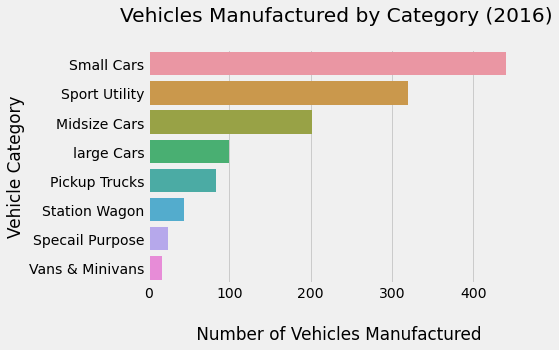

In [133]:
plt.style.use('fivethirtyeight')
ax = sns.barplot(data=category_counts, x='Count',
               y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
plt.title('Vehicles Manufactured by Category (2016)\n')

In [134]:
vehicles_1985 = vehicles[vehicles['Year']==1985]
category_counts = agg_count(vehicles_1985,'Vehicle Category')
category_counts

,Vehicle Category,Count
0,Small Cars,520
1,Pickup Trucks,316
2,Specail Purpose,192
3,Station Wagon,179
4,Midsize Cars,176
5,Vans & Minivans,155
6,large Cars,43


Text(0.5, 1.0, 'Vehicle Manufactured by Category')

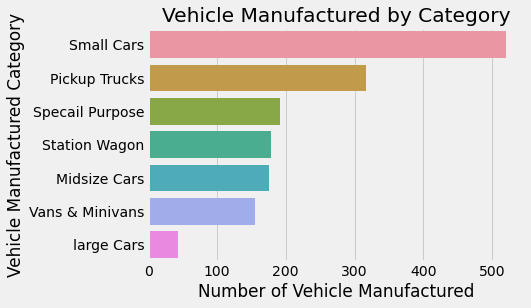

In [135]:
plt.style.use('fivethirtyeight')
sns.barplot(data=category_counts,x='Count', y='Vehicle Category')
plt.xlabel('Number of Vehicle Manufactured')
plt.ylabel('Vehicle Manufactured Category')
plt.title('Vehicle Manufactured by Category')

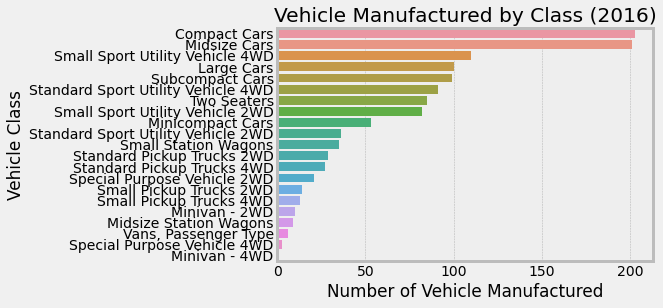

In [140]:
class_counts = agg_count(vehicles_2016,'Vehicle Class')

plt.style.use('bmh')
sns.barplot(data = class_counts, x = "Count", y ="Vehicle Class")
plt.xlabel('Number of Vehicle Manufactured')
plt.title('Vehicle Manufactured by Class (2016)');

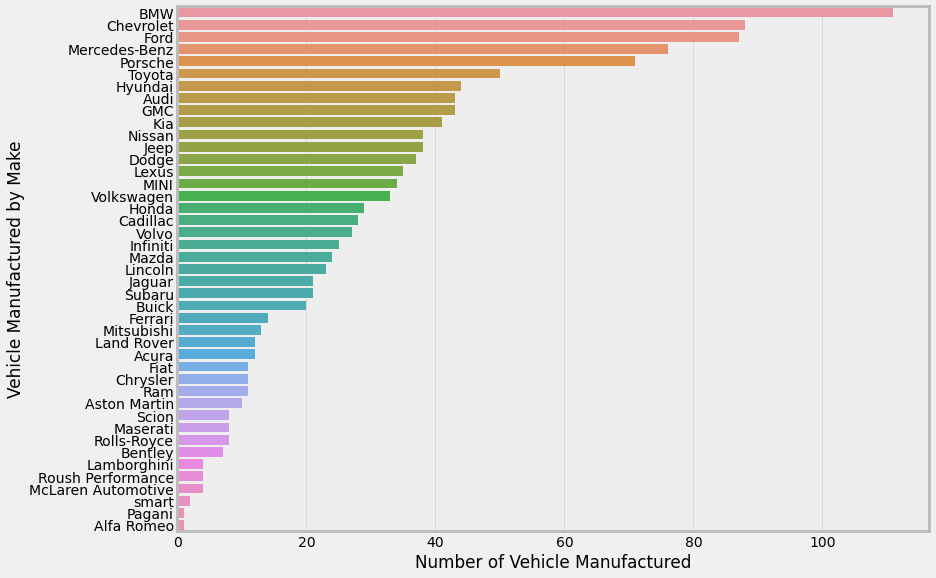

In [145]:
make_counts = agg_count(vehicles_2016, 'Make')
plt.figure(figsize=(12,9))
sns.barplot(data=make_counts, x = "Count", y = "Make")
plt.xlabel('Number of Vehicle Manufactured')
plt.ylabel('Vehicle Manufactured by Make');

Text(0.5, 1.0, 'Very Fuel Efficient Vehicle by Make')

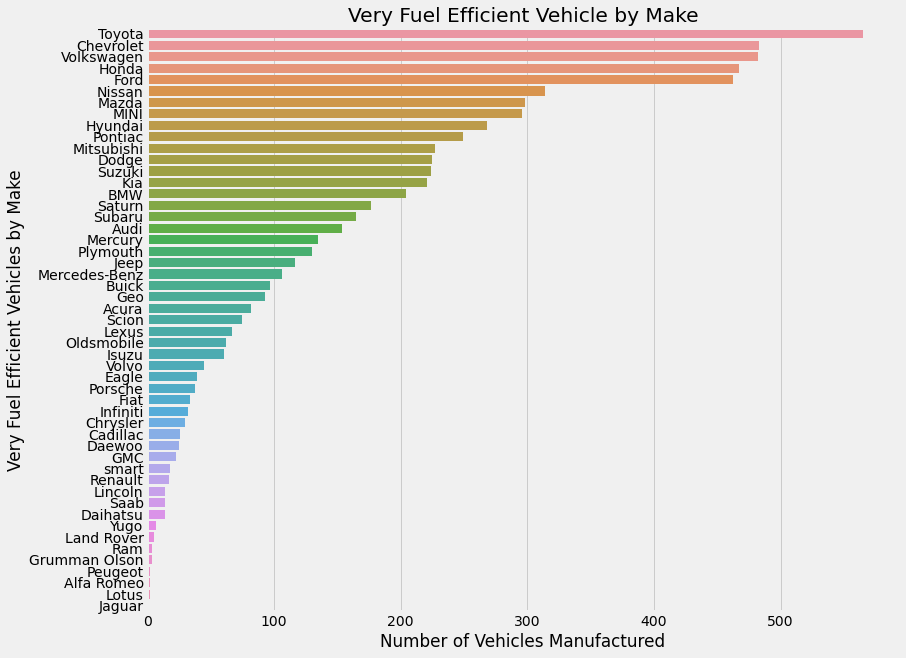

In [151]:
very_efficient = vehicles[vehicles['Fuel Efficiency']=='Very High Efficiency']

make_count = agg_count(very_efficient, 'Make')

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
sns.barplot(data = make_count, x = 'Count',y = 'Make')
plt.xlabel('Number of Vehicles Manufactured')
plt.ylabel('Very Fuel Efficient Vehicles by Make');
plt.title('Very Fuel Efficient Vehicle by Make')

In [163]:
def agg_avg(df,group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    grouped = grouped.sort_values(calc_field,ascending=False)
    grouped.columns = [group_field,'Avg '+ str(calc_field)]
    return grouped

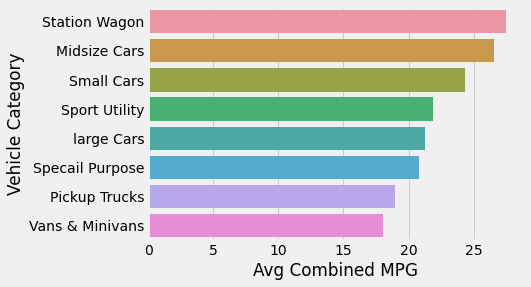

In [164]:
category_avg_mpg = agg_avg(vehicles_2016, 'Vehicle Category','Combined MPG')

sns.barplot(data = category_avg_mpg, x = 'Avg Combined MPG', y='Vehicle Category')
plt.xlabel = ('Average Combined MPG')
plt.title = ('Average Combined MPG by Category(2016)');


In [186]:
import numpy as np
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values= calc_field,
                              index = rows,
                             columns = columns,
                             aggfunc=np.size).dropna(axis=0,
                                                     how ='all')
                             
    return df_pivot

In [187]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency',
                              'Engine Size',
                              'Combined MPG')

In [188]:
effic_size_pivot

Engine Size,Very Small Engine,Small Engine,Moderate Engine,Large Engine,Very Large Engine
Fuel Efficiency,,,,,
Very Low Efficiency,NaN,NaN,4.0,23.0,72.0
Low Efficiency,NaN,NaN,18.0,49.0,81.0
Moderate Efficiency,NaN,2.0,62.0,76.0,21.0
High Efficiency,33.0,42.0,135.0,67.0,2.0
Very High Efficiency,373.0,97.0,69.0,2.0,NaN


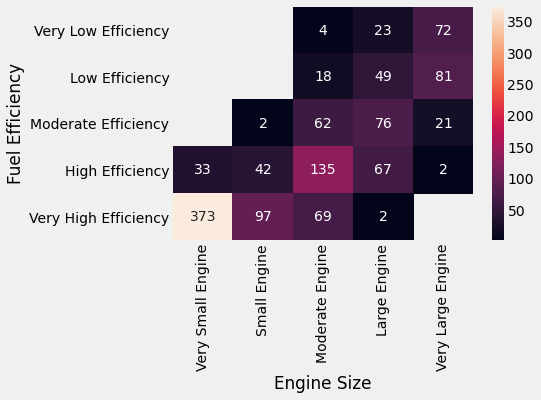

In [182]:
sns.heatmap(effic_size_pivot, annot=True,fmt='g')
plt.xlabel=('Engine Size')
plt.title=('Fuel Efficiency vs Engine Size (2016)')

TypeError: 'str' object is not callable

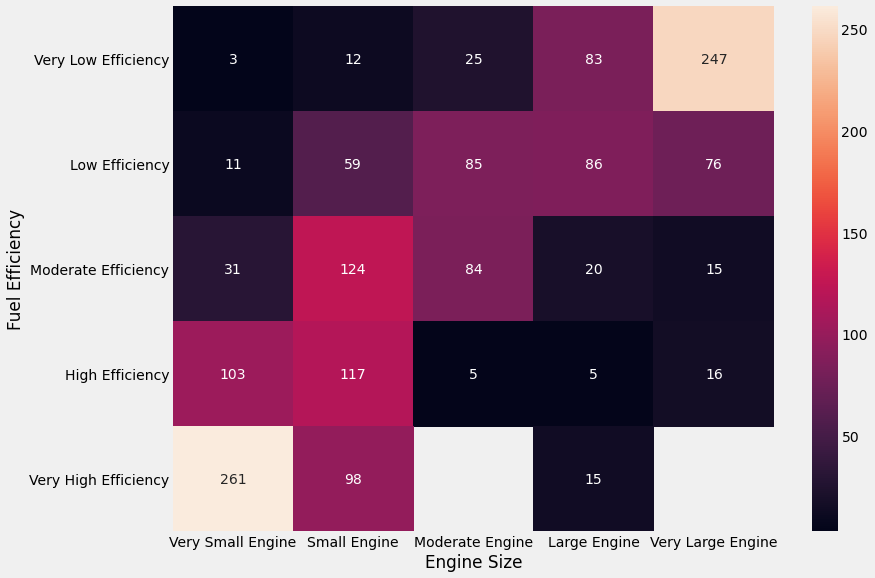

In [214]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency',
                               'Engine Size','Combined MPG')


plt.figure(figsize=(12,9))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
plt.title('Fuel Efficiency vs Engine Size (1985)')
plt.show()

<AxesSubplot:xlabel='Vehicle Category', ylabel='Engine Size-Fuel Efficiency'>

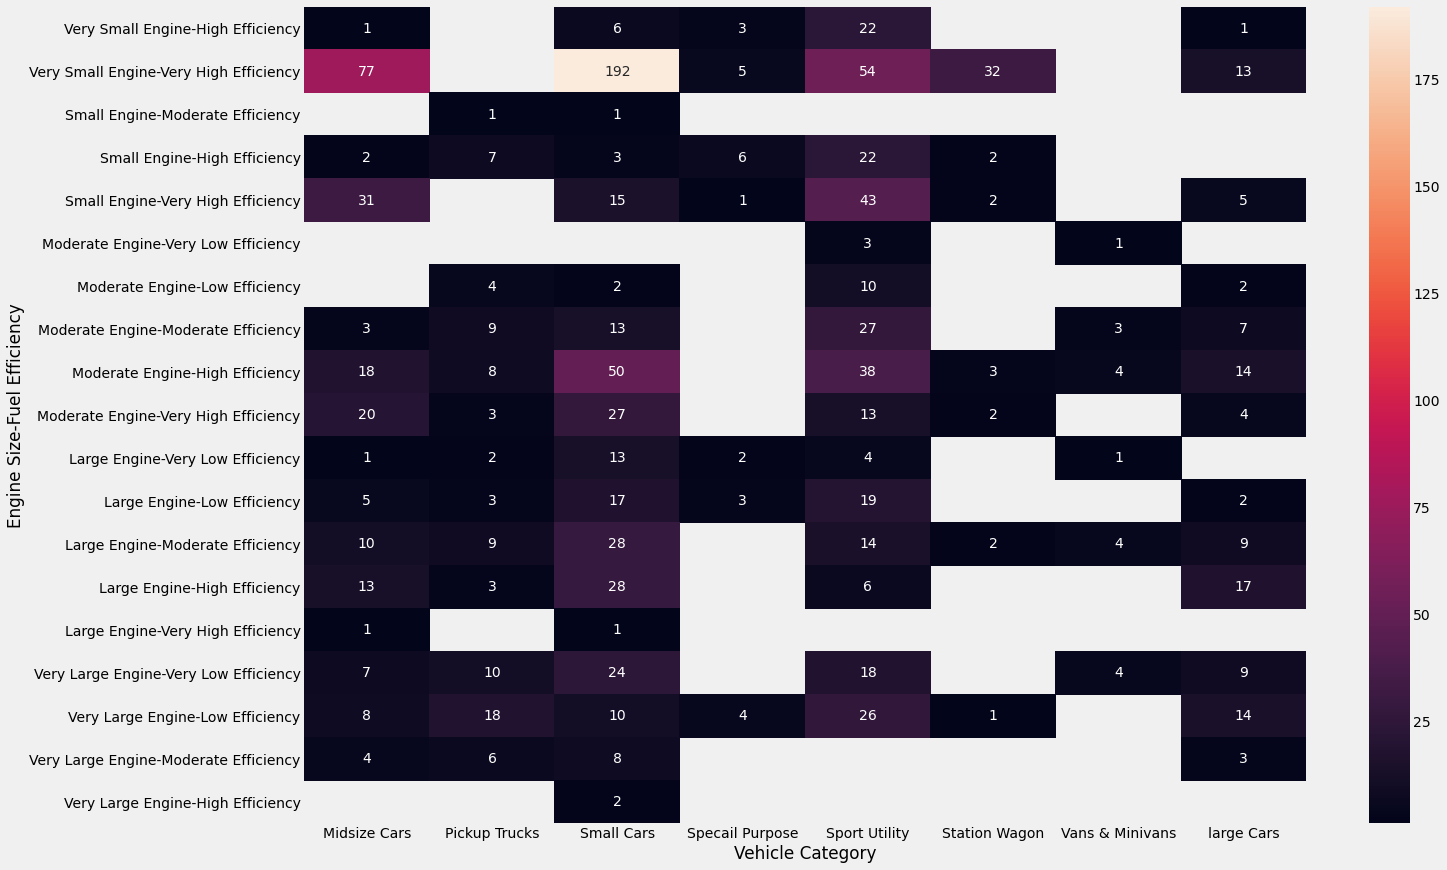

In [220]:
effic_size_category = pivot_count(vehicles_2016,['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')

plt.figure(figsize=(20,14))
sns.heatmap(effic_size_category,annot=True,fmt='g')


<AxesSubplot:xlabel='Vehicle Category', ylabel='Make'>

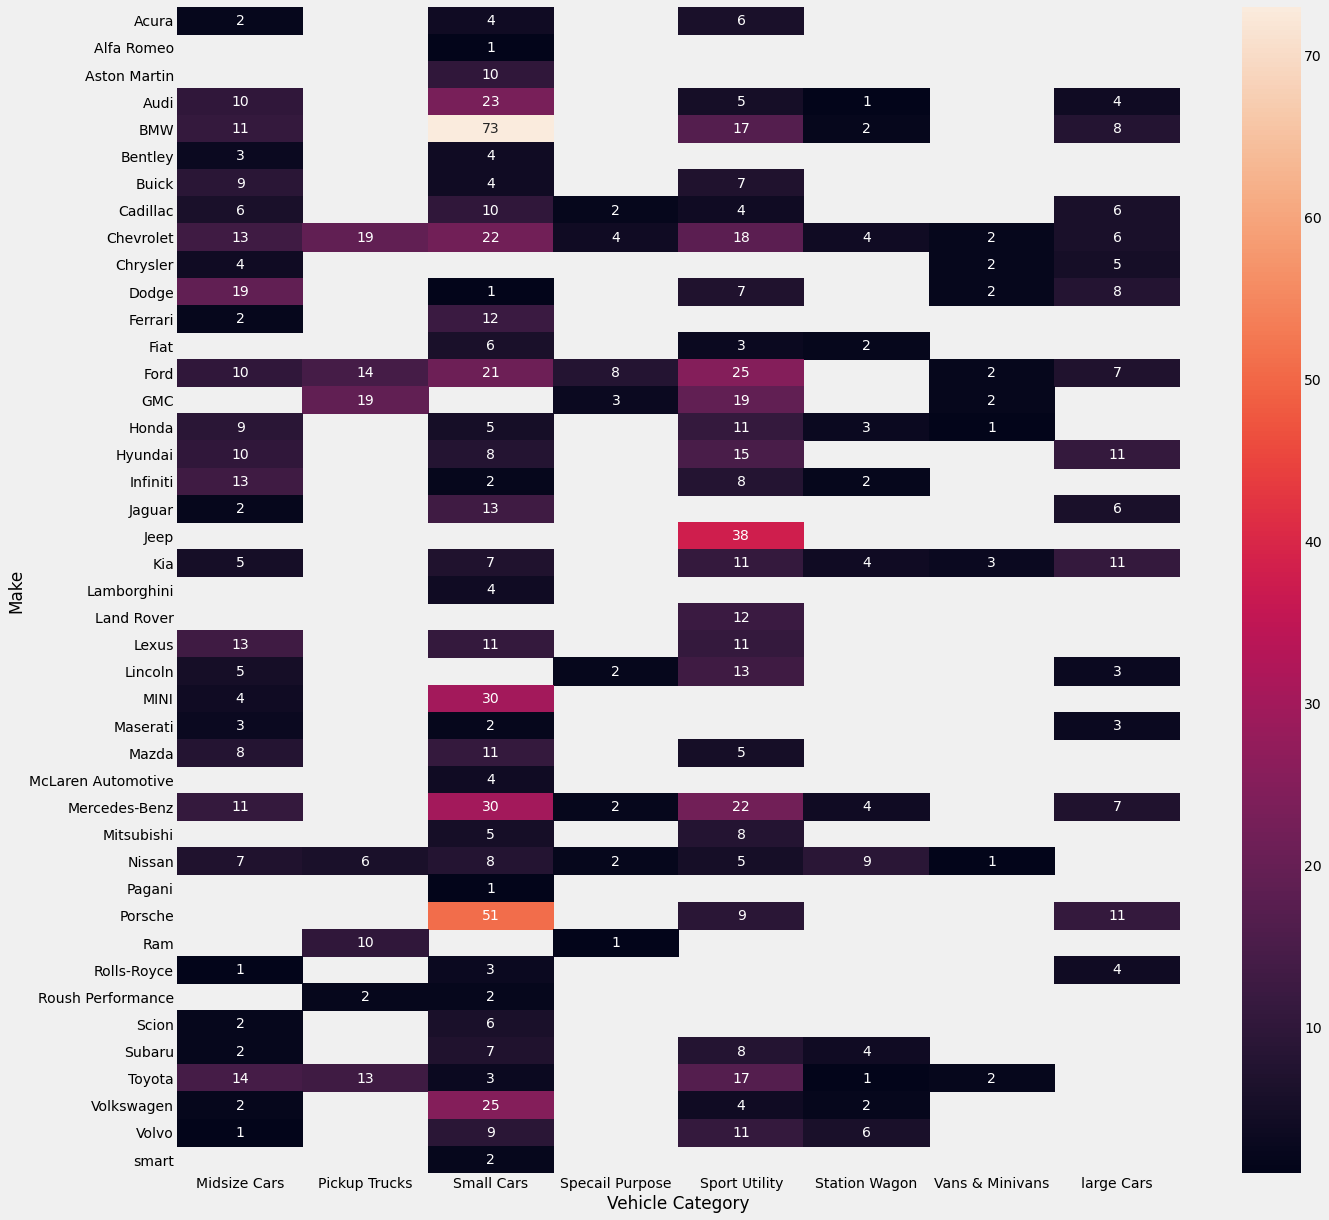

In [221]:
effic_size_category = pivot_count(vehicles_2016,'Make','Vehicle Category','Combined MPG')

plt.figure(figsize=(20,20))
sns.heatmap(effic_size_category,annot=True,fmt='g')


In [224]:
def multi_line(df,x,y):
    ax = df.groupby([x,y]).size().unstack(y).plot(figsize=(15,8),cmap='Set2')

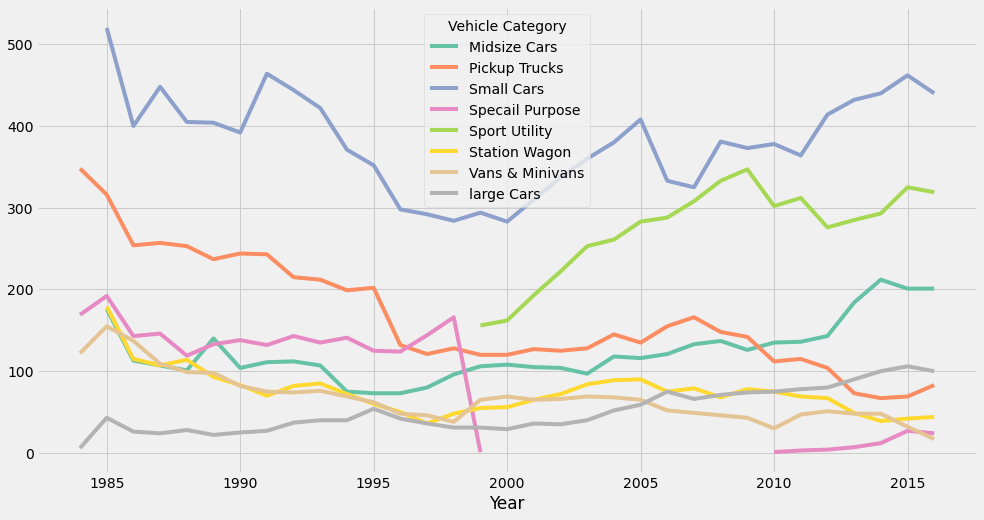

In [226]:
multi_line(vehicles,'Year','Vehicle Category')

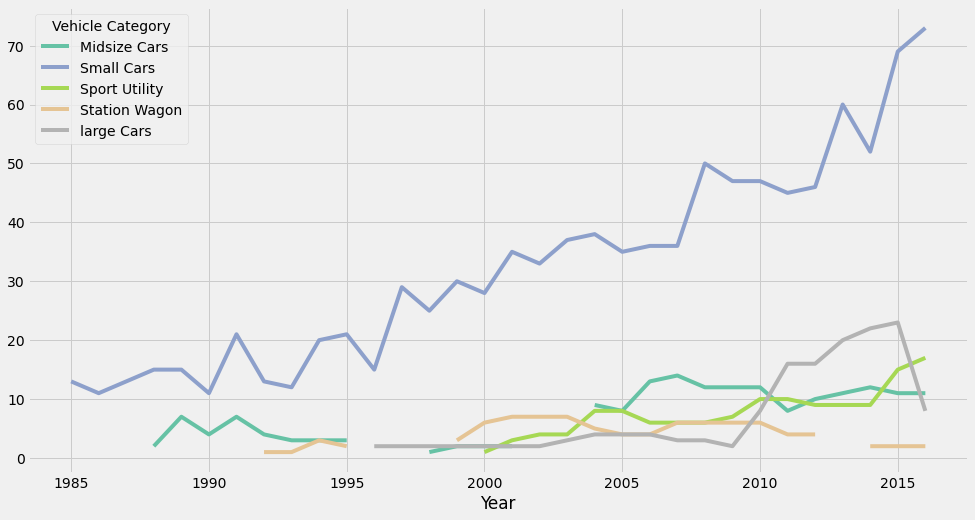

In [240]:
bmw = vehicles[vehicles['Make'] == 'BMW']

multi_line(bmw, 'Year', 'Vehicle Category')

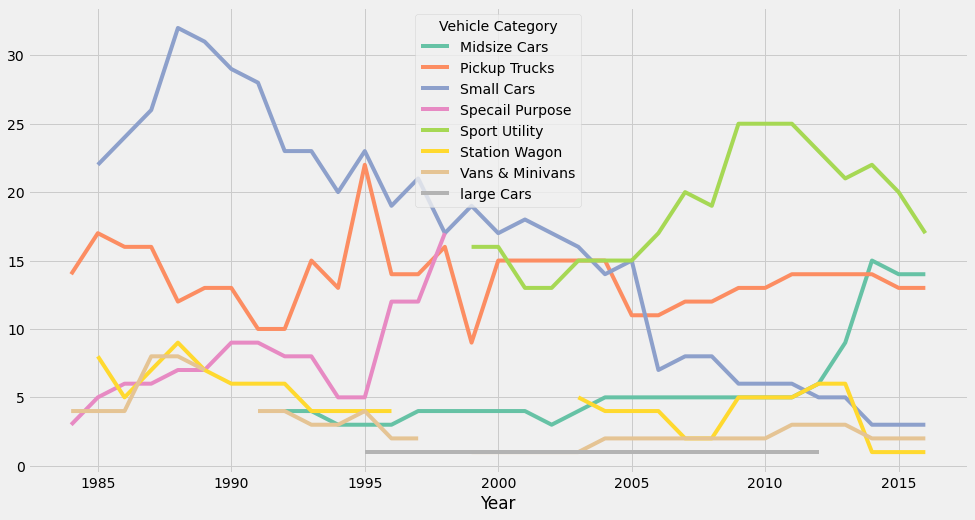

In [241]:
toyota = vehicles[vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')

C:\Users\D.K\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


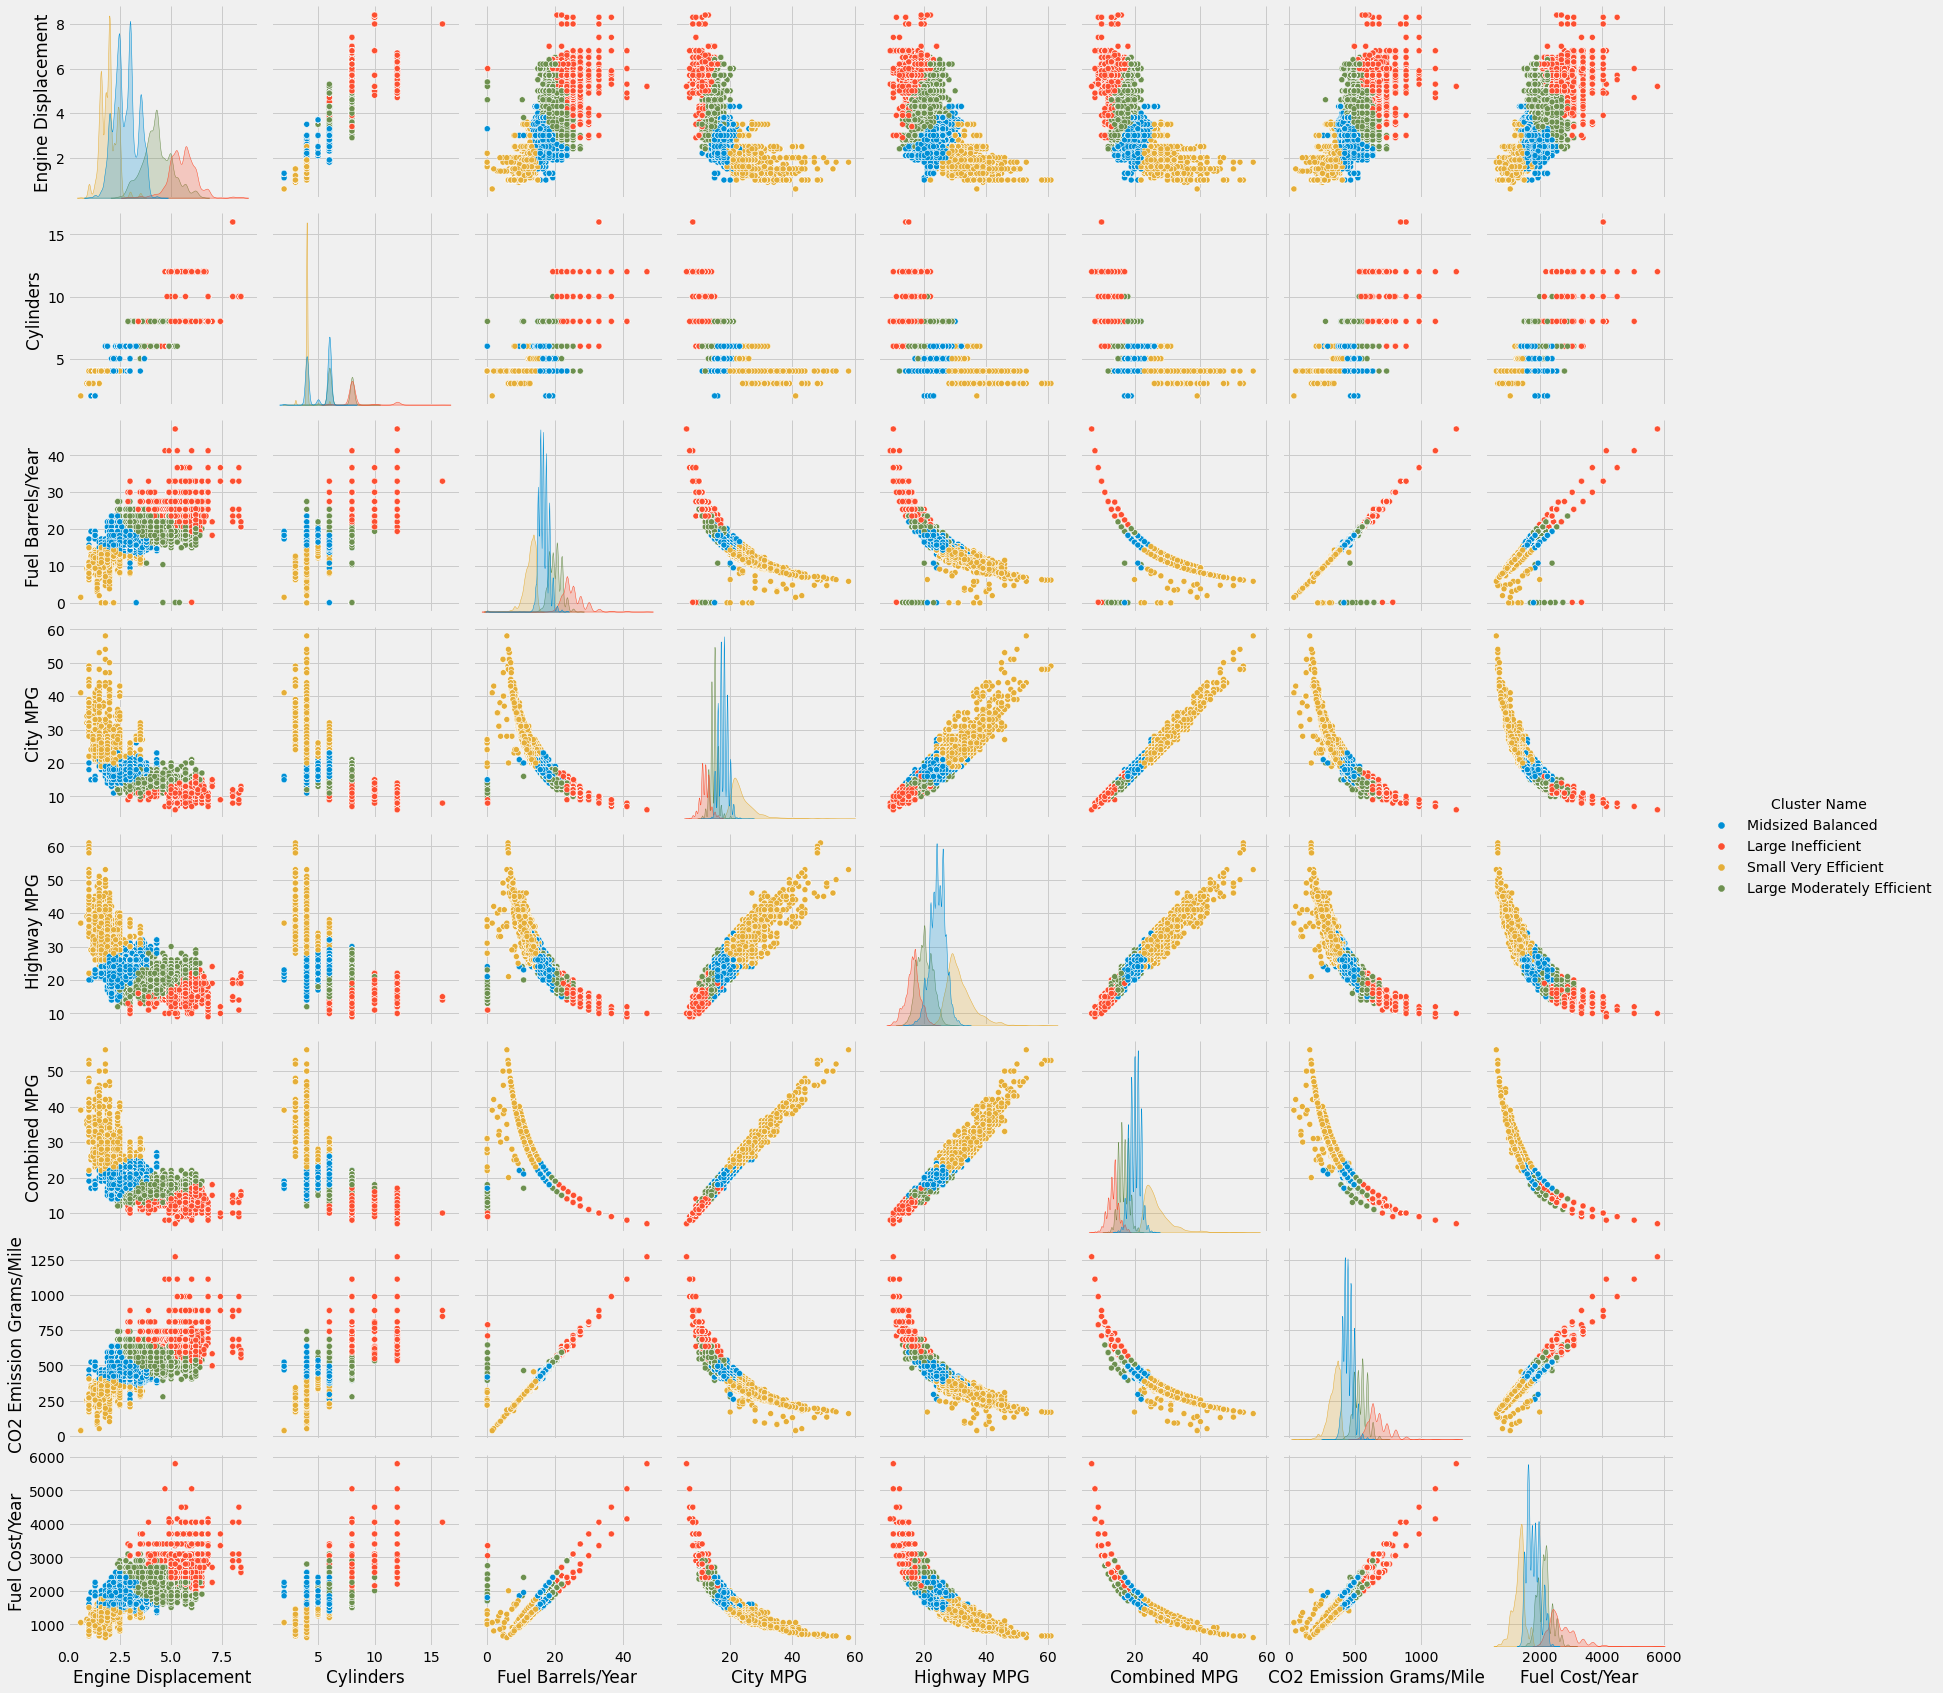

In [262]:
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']
sns.pairplot(vehicles[select_columns],hue='Cluster Name',size=3)

C:\Users\D.K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


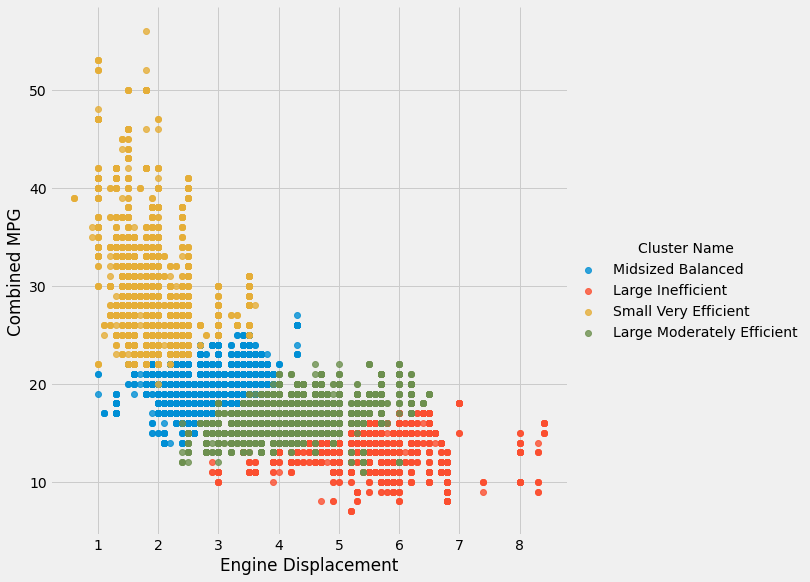

In [263]:
sns.lmplot('Engine Displacement','Combined MPG',vehicles,
           hue='Cluster Name',height=8,fit_reg=False)